### Working with unstructured data (Module 07)


- A huge area. We will just scratch the surface.
- We will focus on text, but this also applies to images, audio data, some sensor data ...  
- I first heard about this area ~7 years ago and was very excited. I think it is a little more common these days? 
- Why text? People interact with each other through language, so computational text analysis is a neat way to combine interests in computers & human society.
- Jargon: "natural language processing," "computational linguistics," "text as data," "NLP+CSS." These things have slightly different meanings, but there is a lot of overlap.

#### Resources

If six 50-minute sessions working with text data is not enough for you, there are many ways to keep going with it.

- Courses:
    - [LING 1200](https://catalog.colorado.edu/courses-a-z/ling/) (cross listed with INFO)
    - [MS degree at CU](https://www.colorado.edu/linguistics/graduate-program/computational-linguistics-clasic-ms)


- Books: 
    - [Intro to Natural Language Processing](https://github.com/jacobeisenstein/gt-nlp-class/blob/master/notes/eisenstein-nlp-notes.pdf) (Available as hardback, or use the linked PDF off GitHub.)
    - [Foundations of Statistical Natural Language Processing](https://nlp.stanford.edu/fsnlp/) (Older text book, still good. You can find PDFs online.)
    
    
- Conferences:
    - [Text as data](https://www.textasdata2019.net/) (Political science + computer science)
    - [CS + J](http://cplusj.org/) (Not strictly for text, but comes up a lot)
    - [*CL](http://aclweb.org/) (Umbrella org for conferences focused on computers + text, aka "natural langauge processing")
    - [#NLProc](https://twitter.com/hashtag/nlproc?lang=en) (A group of very knowledgeable researchers and practitioners talk about this stuff all day on Twitter. If you want to keep up with the latest and greatest, this is a good way to do so.)
    

- Software:
    - [NLTK](https://github.com/nltk/nltk) Very popular software for NLP in Python. Common entry into NLP.
    - [Spacy](https://spacy.io/) Another popular Python NLP library. Way more performant than NLTK, and perhaps better maintained. 
    - [Hugging Face](https://github.com/huggingface) New NLP library focused on specific kinds of neural networks that are very popular. You might find this one hard to work with, but good to know about.
    - [AllenNLP](https://allennlp.org/) Another new-ish one that is good to just be aware of. More focused on research.

### Structured vs. unstructured data

Examples:
- [Structured](https://github.com/nytimes/covid-19-data/blob/master/us.csv)
- [Unstructured](https://www.reddit.com/r/cuboulder/)

Questions:
- What is the difference between structured and unstructured?
- What are other examples of unstructured data?

### Text step 1: Tokenization 

- Text usually starts as a string of characters
- We need to take that string of characters and turn it into a list of words
- Tokenization is the process of doing so
- _Sorry, 4604 students. Everyone needs to know this. It is the first step in most NLP pipelines. There is a little overlap here w/ recent 4604 classes._

In [3]:
from ptb import TreebankWordTokenizer
# This is the Penn Tree Bank tokenizer from NLTK as just one file
tok = TreebankWordTokenizer()
tok.tokenize("Hello this is a tokenizer")

tok.tokenize("I can't go outside")

['I', 'ca', "n't", 'go', 'outside']

Questions: 
    
- How is this different than split (h/t Jay) 
- Why do you think it might make sense to split "can't" into "ca," "n't"? What information does this give to a computer?

Questions: 
    
- Read in `dogs10k.jsonl`. Access the `body` field. This is cleaned up data from the pushift API

- Why is this unstructured data?

- Can you figure out how to find the post from the data on reddit? 

In [ ]:
Questions: 
    
- Tokenize the body of each post on `dogs10k.jsonl` to create a vocabulary set

In [21]:
import json
V = set()
D = 0

with open("dogs10k.jsonl", "r") as inf:
    for doc in inf:
        D += 1
        doc = json.loads(doc)
        for token in tok.tokenize(doc["body"]):
            V.add(token)
            
V = list(V) # we want a consistent order. Not sure the latest on Python set ordering

In [ ]:
Questions: 
    
- What is D?
- What is V?
- Is D bigger than V?

In [10]:
# understanding enumerate

for docno, doc in enumerate(["A", "B", "C"]):
    print(docno, doc)

0 A
1 B
2 C


### Numberization

- A great word
- Turning words into numbers
- This is honestly a mind-bender
- Pause for a minute here. We are going from words to numbers.
- When we use numbers, we can use tools from math to reason about words. 
- Pause. Breathe.
- [Cool book](https://web.stanford.edu/group/cslipublications/cslipublications/site/1575864487.shtml) about this. It's a big conceptual leap.

In [ ]:
# Mapping words to numbers and back

for docno, doc in enumerate(["A", "B", "C"]):
    print(docno, doc)

In [22]:
# create the mapping

v2n = {}
n2v = {}
for vno, v in enumerate(V):
    v2n[v] = vno
    n2v[vno] = v

# Questions 

- What is n2v for "fetch"
- What is v2n for 15?
- How many times does each word occur in $V$?

In [37]:
import numpy as np
import pandas as pd

# Create a binary term document matrix
# The rows are documents, ths columns are words 
# The column is set to 1 if the word occurs in the document

tdm = np.zeros((D, len(V)))

with open("dogs10k.jsonl", "r") as inf:
    for docno, doc in enumerate(inf):
        D += 1
        doc = json.loads(doc)
        for token in tok.tokenize(doc["body"]):
            tdm[docno][v2n[token]] = 1

tdm_df = pd.DataFrame(data=tdm, columns=V)

#### Sparsity 

- What do you notice about each row of `tdm_df`?  # hint: remember our friend iloc

- What do you notice about each column of `tdm_df`?

- Why does this make sense?

- This is a *fundamental* property of text data 

In [ ]:
#### Discrete vs. continuous 

- Are these rows and columns discrete or continuous? 
- This is a *fundamental* property of text data 

In [ ]:
#### Review

- What are two fundamental properties of text data?

#### Most common words, least common words

- What are the 10 most common words? What do you notice? 

- What are the 10 least common words? What do you notice? 

- Do you think the most common words would also be common in a subreddit about cats?

- We will test this shortly

- Which words do you think would be more common in a subreddit about dogs?

In [43]:
word_totals = tdm_df.sum(axis=0)

word_totals.sort_values(ascending=False)[0:10]

.      6704.0
,      6334.0
a      6333.0
the    6117.0
to     6098.0
I      5640.0
and    5582.0
of     4498.0
you    4132.0
for    3969.0
dtype: float64

In [44]:
word_totals.sort_values(ascending=True)[0:10]

guard-dog                     1.0
Missing.                      1.0
bank.                         1.0
gang                          1.0
vindictive                    1.0
Doc                           1.0
pouring.                      1.0
11pm.                         1.0
produced.                     1.0
fuseaction=product.display    1.0
dtype: float64

#### Least common words that occur at least 5 times 

What are the 10 least common words? What do you notice? 

In [48]:
word_totals[word_totals > 5].sort_values(ascending=True)[0:10]

beauty         6.0
mobility       6.0
Trust          6.0
dumped         6.0
allergen       6.0
redirecting    6.0
distinguish    6.0
precise        6.0
stress.        6.0
stats          6.0
dtype: float64

#### Probability 

- Think all the way back to 2301
- What if each word is an event?
- What is the probability of observing the word "frisbee"?
- Do you think it will be high or low? 
- More sparsity...

In [50]:
word_totals["frisbee"]

8.0

#### Zipf's law 

- In the 1930s the linguist George Zipf noticed a relationship between the frequency of a word, and its rank (e.g. 3rd most common, 10th most common) in a corpus
- [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law) page has more

- The frequency of a word is inversely proportional to its rank

- Let's test Zipf's law on our Reddit dogs data set. We will just look at an informal, non-logs scaled plot

- If you want to do a more formal test, you can work from the Wikipedia page. Measure the average square root of the squared deviation from the prediction. It would be a good exercize.

In [67]:
# Create a data frame where the index is the rank of a word 
# The frequency of the word is stored is stored in a column called frequency

rev = word_totals.sort_values(ascending=False)

<AxesSubplot:>

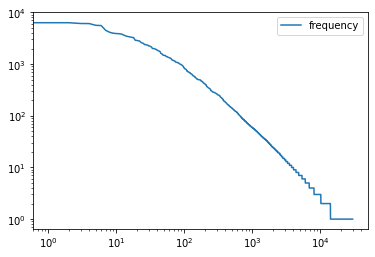

In [73]:
rev.index = [i for i in range(len(rev))]

rev = pd.DataFrame(rev)

rev.columns = ["frequency"]

rev.plot(logx=True, logy=True)

<AxesSubplot:>

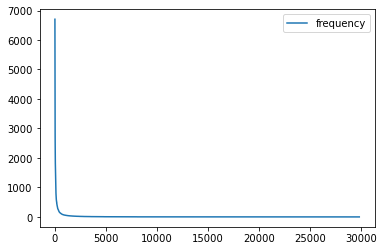

In [75]:
rev.plot()

#### Questions 

- How does this plot relate to sparisity? 
- Where do you think you would find the word "the" on this plot?
- Where do you think you would find the word "pitbull"?